In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import bambi as bmb
import arviz as az

In [94]:
df = pd.read_excel('statistics.xlsx')
df

,t1,t2,hits,genre1,genre2,subgenre1,subgenre2,date1,date2,author1,author2
0,Alexanders geesten,Alexiuslegende,0.000000,Epiek,Epiek,Ridder,Heiligenleven,1400.0,1295.5,Jacob van Maerlant,NaN
1,Alexanders geesten,Anatomie van de mens,0.000903,Epiek,Epiek,Ridder,Didactiek,1400.0,1375.0,Jacob van Maerlant,NaN
2,Alexanders geesten,Arturs doet,0.040564,Epiek,Epiek,Ridder,Arthur,1400.0,1325.0,Jacob van Maerlant,NaN
3,Alexanders geesten,Aubri de Borgengoen,0.008172,Epiek,Epiek,Ridder,Karel,1400.0,1350.0,Jacob van Maerlant,NaN
4,Alexanders geesten,Barlaam en Josaphat,0.001806,Epiek,Epiek,Ridder,Ridder,1400.0,1387.5,Jacob van Maerlant,NaN
...,...,...,...,...,...,...,...,...,...,...,...
25755,Merlijn-continuatie,Walewein,0.035389,Epiek,Epiek,Arthur,Arthur,1425.0,1350.0,Lodewijk van Velthem,Penninc en Pieter Vostaert
25756,Merlijn-continuatie,Walewein ende Keye,0.051769,Epiek,Epiek,Arthur,Arthur,1425.0,1325.0,Lodewijk van Velthem,NaN
25757,Merlijn-continuatie,Willem van Oringen,0.004553,Epiek,Epiek,Arthur,Karel,1425.0,1325.0,Lodewijk van Velthem,Clays van Haerlem
25758,Merlijn-continuatie,Wisselau,0.008085,Epiek,Epiek,Arthur,Karel,1425.0,1295.5,Lodewijk van Velthem,NaN


In [139]:
df.sort_values('hits', ascending=False).iloc[50:100]

,t1,t2,hits,genre1,genre2,subgenre1,subgenre2,date1,date2,author1,author2,subgenre,author,date
11112,Lancelot,Limborch,0.073339,Epiek,Epiek,Arthur,Ridder,1325.0,1350.0,NaN,Heinriic,False,False,-25.0
16694,Rijmkroniek van Woeringen,Grimbergse oorlog,0.073099,Epiek,Epiek,Historiografie,Historiografie,1440.0,1325.0,Jan van Heelu,NaN,True,False,115.0
3303,Brabantsche yeesten (B7),Rijmkroniek van Woeringen,0.072567,Epiek,Epiek,Historiografie,Historiografie,1470.0,1440.0,NaN,Jan van Heelu,True,False,30.0
20607,Spiegel historiael (P2),Spiegel historiael (P1-P4 [Maerlant]),0.072333,Epiek,Epiek,Historiografie,Historiografie,1337.5,1312.5,Philip Utenbroeke,Jacob van Maerlant,True,False,25.0
9512,Historie van Troyen,Limborch,0.072028,Epiek,Epiek,Ridder,Ridder,1475.0,1350.0,Jacob van Maerlant,Heinriic,True,False,125.0
16425,Rijmbijbel,Roman der Lorreinen,0.071950,Epiek,Epiek,Religie,Karel,1285.0,1350.0,NaN,NaN,False,False,-65.0
25603,Merlijn-continuatie,Arturs doet,0.071716,Epiek,Epiek,Arthur,Arthur,1425.0,1325.0,Lodewijk van Velthem,NaN,True,False,100.0
20393,Spiegel historiael (P1-P4 [Maerlant]),Limborch,0.071228,Epiek,Epiek,Historiografie,Ridder,1312.5,1350.0,Jacob van Maerlant,Heinriic,False,False,-37.5
9494,Historie van Troyen,Grimbergse oorlog,0.071214,Epiek,Epiek,Ridder,Historiografie,1475.0,1325.0,Jacob van Maerlant,NaN,False,False,150.0
20389,Spiegel historiael (P1-P4 [Maerlant]),Lancelot,0.071127,Epiek,Epiek,Historiografie,Arthur,1312.5,1325.0,Jacob van Maerlant,NaN,False,False,-12.5


In [140]:
trg = ['Moriaen', 'Lantsloot van der Haghedochte', 'Karel ende Elegast']
trg_df = df[(df['t1'].isin(trg)) & (df['t2'].isin(trg))]
th = trg_df['hits'].mean()
print(th)
trg_df

0.035928813129334075


,t1,t2,hits,genre1,genre2,subgenre1,subgenre2,date1,date2,author1,author2,subgenre,author,date
10469,Karel ende Elegast,Lantsloot van der Haghedochte,0.018377,Epiek,Epiek,Karel,Arthur,1487.0,1325.0,NaN,NaN,False,False,162.0
10479,Karel ende Elegast,Moriaen,0.019501,Epiek,Epiek,Karel,Arthur,1487.0,1325.0,NaN,NaN,False,False,162.0
11265,Lantsloot van der Haghedochte,Karel ende Elegast,0.025755,Epiek,Epiek,Arthur,Karel,1325.0,1487.0,NaN,NaN,False,False,-162.0
11279,Lantsloot van der Haghedochte,Moriaen,0.067331,Epiek,Epiek,Arthur,Arthur,1325.0,1325.0,NaN,NaN,True,False,0.0
12865,Moriaen,Karel ende Elegast,0.022310,Epiek,Epiek,Arthur,Karel,1325.0,1487.0,NaN,NaN,False,False,-162.0
12870,Moriaen,Lantsloot van der Haghedochte,0.062298,Epiek,Epiek,Arthur,Arthur,1325.0,1325.0,NaN,NaN,True,False,0.0


Most central text?

In [141]:
df.groupby('t1')['hits'].median().sort_values(ascending=False).head(30)

t1
Luiks Diatessaron                           0.036144
Rijmbijbel                                  0.021812
Rijmkroniek van Woeringen                   0.021421
Brabantsche yeesten (B7)                    0.020953
Grimbergse oorlog                           0.019434
Brabantsche yeesten (B6)                    0.016947
Brabantsche yeesten (B1-5)                  0.016690
Historie van Troyen                         0.015144
Alexanders geesten                          0.013844
Roman der Lorreinen                         0.013406
Rijmkroniek van Holland                     0.012728
Spiegel historiael (P1-P4 [Maerlant])       0.012702
Korte kroniek van Brabant (lange versie)    0.012227
Sint Servaes legende                        0.011935
Spiegel historiael (P5)                     0.011562
Der ystorien bloeme                         0.011559
Renout van Montalbaen                       0.010777
Spiegel historiael (P2)                     0.010322
Merlijn-continuatie                        

In [148]:
df[df['t1'] == 'Rijmkroniek van Woeringen'].sort_values('hits', ascending=False).head(30)

,t1,t2,hits,genre1,genre2,subgenre1,subgenre2,date1,date2,author1,author2,subgenre,author,date
16769,Rijmkroniek van Woeringen,Spiegel historiael (P5),0.076231,Epiek,Epiek,Historiografie,Historiografie,1440.0,1325.0,Jan van Heelu,Lodewijk van Velthem,True,False,115.0
16694,Rijmkroniek van Woeringen,Grimbergse oorlog,0.073099,Epiek,Epiek,Historiografie,Historiografie,1440.0,1325.0,Jan van Heelu,NaN,True,False,115.0
16658,Rijmkroniek van Woeringen,Brabantsche yeesten (B1-5),0.068227,Epiek,Epiek,Historiografie,Historiografie,1440.0,1470.0,Jan van Heelu,Jan van Boendale,True,False,-30.0
16659,Rijmkroniek van Woeringen,Brabantsche yeesten (B6),0.061185,Epiek,Epiek,Historiografie,Historiografie,1440.0,1432.0,Jan van Heelu,NaN,True,False,8.0
16743,Rijmkroniek van Woeringen,Rijmkroniek van Holland,0.057880,Epiek,Epiek,Historiografie,Historiografie,1440.0,1375.0,Jan van Heelu,Melis Stoke,True,False,65.0
16776,Rijmkroniek van Woeringen,Van den derden Eduwaert,0.057118,Epiek,Epiek,Historiografie,Historiografie,1440.0,1445.0,Jan van Heelu,Jan van Boendale,True,False,-5.0
16707,Rijmkroniek van Woeringen,Korte kroniek van Brabant (lange versie),0.056736,Epiek,Epiek,Historiografie,Historiografie,1440.0,1410.0,Jan van Heelu,Heraut Beyeren,True,False,30.0
16745,Rijmkroniek van Woeringen,Roman der Lorreinen,0.053466,Epiek,Epiek,Historiografie,Karel,1440.0,1350.0,Jan van Heelu,NaN,False,False,90.0
16640,Rijmkroniek van Woeringen,Alexanders geesten,0.048579,Epiek,Epiek,Historiografie,Ridder,1440.0,1400.0,Jan van Heelu,Jacob van Maerlant,False,False,40.0
16660,Rijmkroniek van Woeringen,Brabantsche yeesten (B7),0.046599,Epiek,Epiek,Historiografie,Historiografie,1440.0,1470.0,Jan van Heelu,NaN,True,False,-30.0


In [133]:
df['subgenre'] = df['subgenre1'] == df['subgenre2']
df['author'] = df['author1'] == df['author2']
df['date'] = df['date1'] - df['date2']
df

,t1,t2,hits,genre1,genre2,subgenre1,subgenre2,date1,date2,author1,author2,subgenre,author,date
0,Alexanders geesten,Alexiuslegende,0.000000,Epiek,Epiek,Ridder,Heiligenleven,1400.0,1295.5,Jacob van Maerlant,NaN,False,False,104.5
1,Alexanders geesten,Anatomie van de mens,0.000903,Epiek,Epiek,Ridder,Didactiek,1400.0,1375.0,Jacob van Maerlant,NaN,False,False,25.0
2,Alexanders geesten,Arturs doet,0.040564,Epiek,Epiek,Ridder,Arthur,1400.0,1325.0,Jacob van Maerlant,NaN,False,False,75.0
3,Alexanders geesten,Aubri de Borgengoen,0.008172,Epiek,Epiek,Ridder,Karel,1400.0,1350.0,Jacob van Maerlant,NaN,False,False,50.0
4,Alexanders geesten,Barlaam en Josaphat,0.001806,Epiek,Epiek,Ridder,Ridder,1400.0,1387.5,Jacob van Maerlant,NaN,True,False,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25755,Merlijn-continuatie,Walewein,0.035389,Epiek,Epiek,Arthur,Arthur,1425.0,1350.0,Lodewijk van Velthem,Penninc en Pieter Vostaert,True,False,75.0
25756,Merlijn-continuatie,Walewein ende Keye,0.051769,Epiek,Epiek,Arthur,Arthur,1425.0,1325.0,Lodewijk van Velthem,NaN,True,False,100.0
25757,Merlijn-continuatie,Willem van Oringen,0.004553,Epiek,Epiek,Arthur,Karel,1425.0,1325.0,Lodewijk van Velthem,Clays van Haerlem,False,False,100.0
25758,Merlijn-continuatie,Wisselau,0.008085,Epiek,Epiek,Arthur,Karel,1425.0,1295.5,Lodewijk van Velthem,NaN,False,False,129.5


In [134]:
df['author'].value_counts()

False    25672
True        88
Name: author, dtype: int64

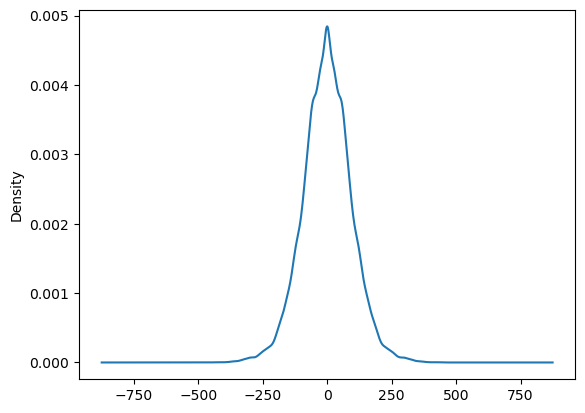

In [135]:
df['date'].plot.kde();

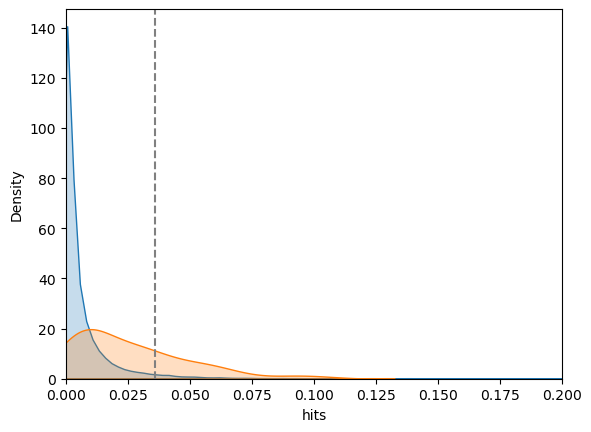

In [136]:
import seaborn as sns
fig, ax = plt.subplots()
for gr, group in df.groupby('author'):
    sns.kdeplot(group['hits'], ax=ax, label=gr, shade=True)
plt.axvline(th, c='grey', ls='--')
plt.xlim(0, .2);

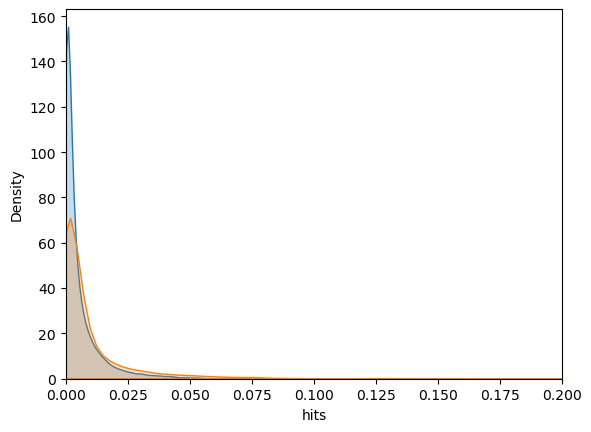

In [101]:
import seaborn as sns
fig, ax = plt.subplots()
for gr, group in df.groupby('subgenre'):
    sns.kdeplot(group['hits'], ax=ax, label=gr, shade=True)
plt.xlim(0, .2);

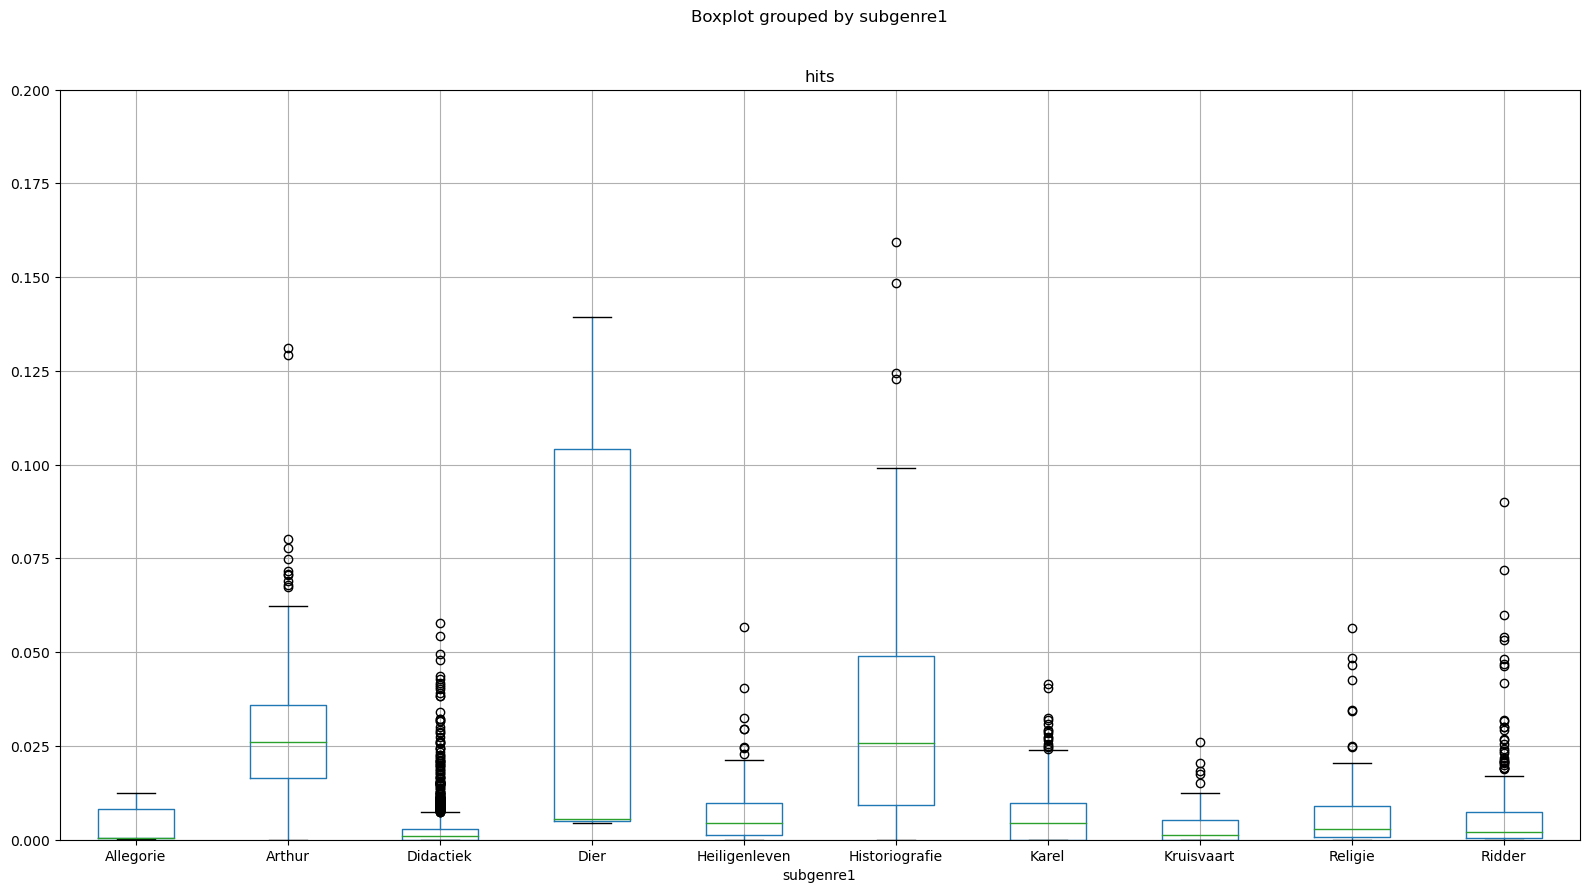

In [102]:
df_match = df[df['subgenre'] == True]
df_match.boxplot('hits', 'subgenre1', figsize=(19, 10))
plt.ylim(0, .2);

In [103]:
df['subgenre'] = df['subgenre'].astype('category')
df['author'] = df['author'].astype('category')

In [104]:
df['subgenre'].value_counts()

False    21920
True      3840
Name: subgenre, dtype: int64

In [105]:
print(len(df))
df = df[~df.isna()]
print(len(df))

25760
25760


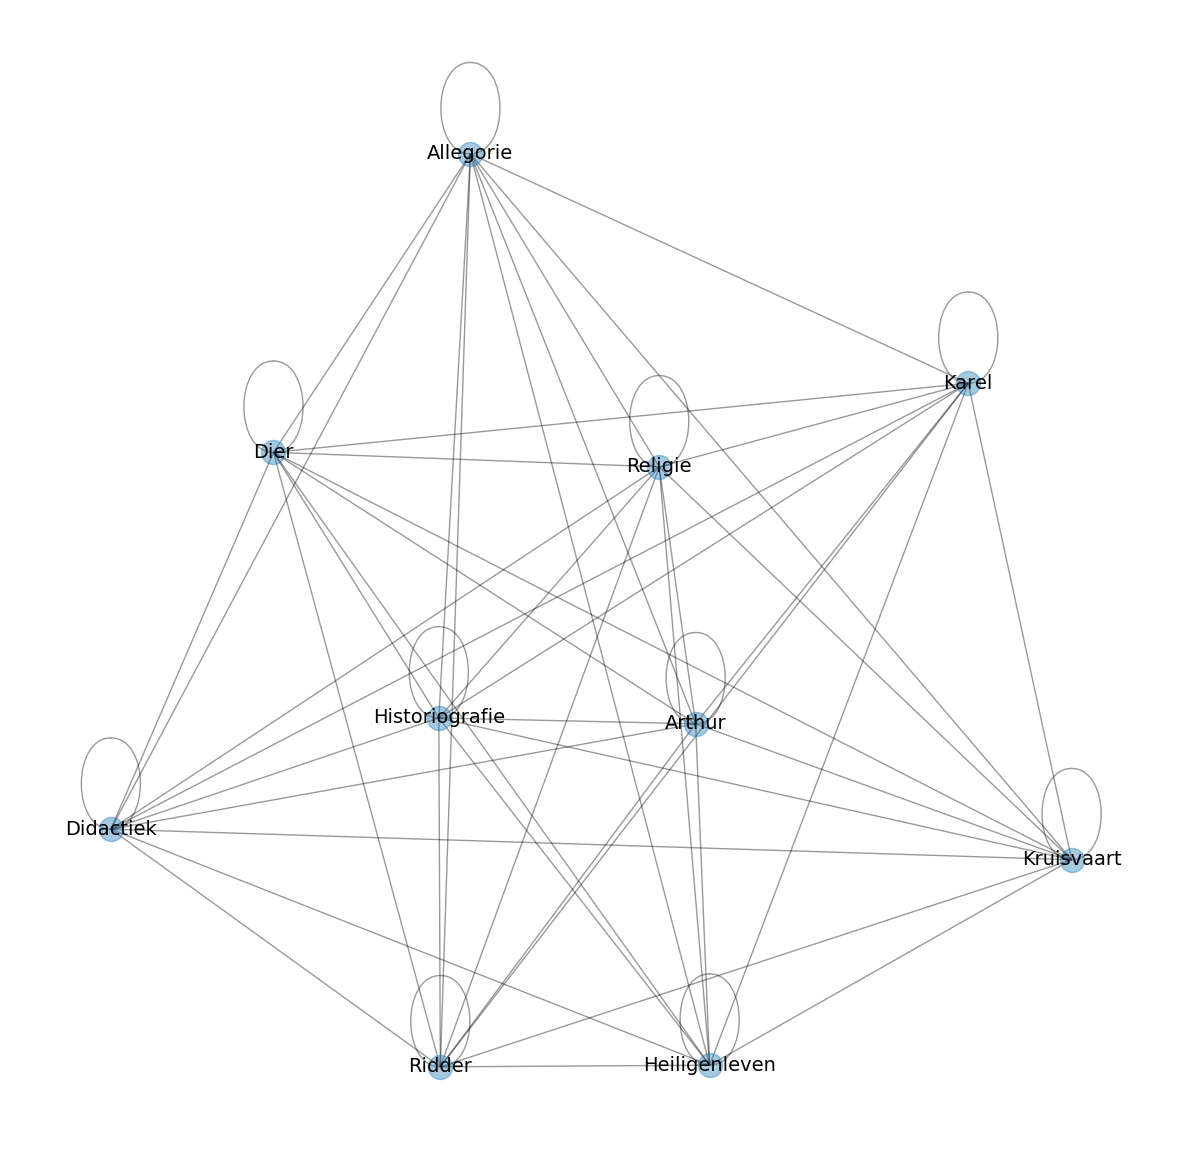

In [106]:
import networkx as nx

intergenre = df.groupby(['subgenre1', 'subgenre2'])['hits'].mean().reset_index().rename_axis(None, axis=1)
intergenre.columns = ('source', 'target', 'weight')

G = nx.from_pandas_edgelist(intergenre, edge_attr='weight')
#nodesizes = [intergenre['weight'] * 10 for speaker in G]

fig = plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.5, iterations=200)
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(G, pos, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=14)
plt.axis('off');

In [107]:
intergenre['target'] += '(trg)'
intergenre['source'] += '(src)'
intergenre

from d3blocks import D3Blocks
d3 = D3Blocks()
d3.sankey(intergenre, showfig=True, overwrite=True)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Sankey]
[d3blocks] >INFO> filepath is set to [/var/folders/kd/w0jjczk911x4pdd7pf2hx6g40000gn/T/d3blocks/sankey.html]
[d3blocks] >INFO> Convert to Frame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/kd/w0jjczk911x4pdd7pf2hx6g40000gn/T/d3blocks/sankey.html]
[d3blocks] >INFO> File not found: [file:////var/folders/kd/w0jjczk911x4pdd7pf2hx6g40000gn/T/d3blocks/sankey.html]
[d3blocks] >INFO> Open browser: file:////var/folders/kd/w0jjczk911x4pdd7pf2hx6g40000gn/T/d3blocks/sankey.html


Auto-assigning NUTS sampler...
[d3blocks] >INFO> Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
[d3blocks] >INFO> Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
[d3blocks] >INFO> Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, author, date, subgenre, hits_sigma]
[d3blocks] >INFO> NUTS: [Intercept, author, date, subgenre, hits_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
[d3blocks] >INFO> Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
[d3blocks] >INFO> finding looplift candidates


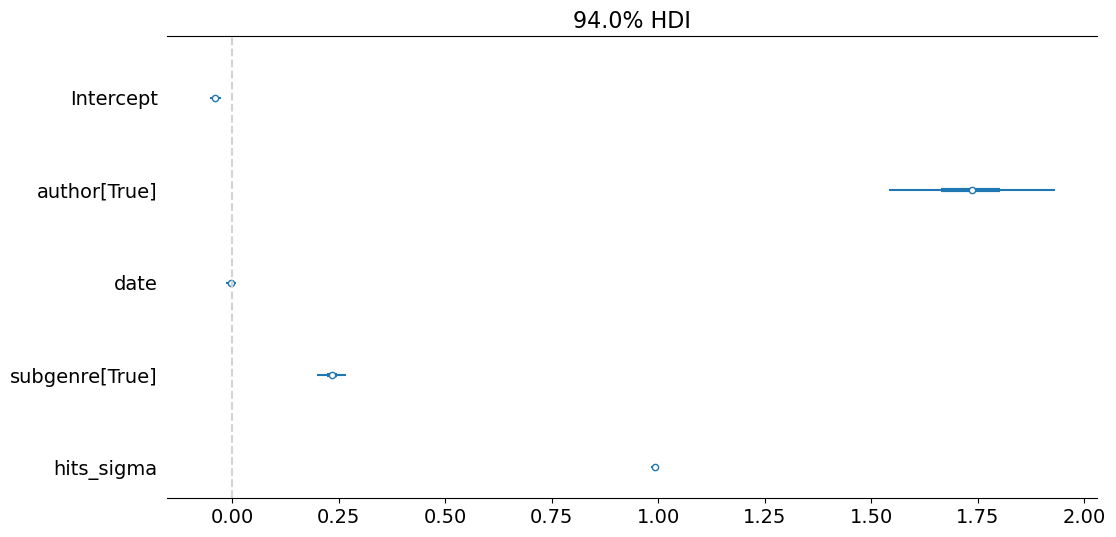

In [89]:
df['date'] = scale(df['date'])
df['hits'] = scale(df['hits'])
model = bmb.Model('hits ~ author + date + subgenre', df)
fit = model.fit(draws=1000, chains=4)
az.summary(fit)
az.plot_forest(fit, combined=True, figsize=(12, 6))
plt.axvline(0, c='lightgrey', ls='--');

Auto-assigning NUTS sampler...
[d3blocks] >INFO> Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
[d3blocks] >INFO> Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
[d3blocks] >INFO> Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, author, date, subgenre1, hits_sigma]
[d3blocks] >INFO> NUTS: [Intercept, author, date, subgenre1, hits_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 90 seconds.
[d3blocks] >INFO> Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 90 seconds.
[d3blocks] >INFO> finding looplift candidates


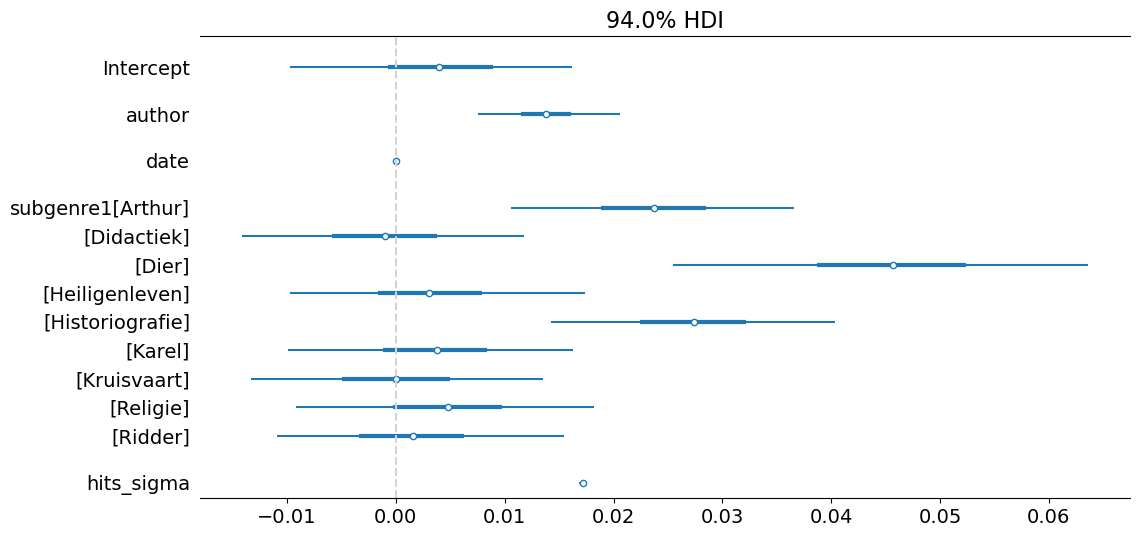

In [90]:
model = bmb.Model('hits ~ author + date + subgenre1', df_match)
fit = model.fit(draws=1000, chains=4)
az.summary(fit)
az.plot_forest(fit, combined=True, figsize=(12, 6))
plt.axvline(0, c='lightgrey', ls='--');

## Intertext network

In [147]:
import networkx as nx

G = nx.Graph() 
for idx, row in df.iterrows():
    t1 = row['t1']
    t2 = row['t2']
    dist = row['hits']
    if dist < .02:
        continue
    if G.has_edge(t1, t2):
        G[t1][t2]['weight'] += 1
    else:
        G.add_edge(t1, t2, weight=1)
print(f"N nodes = {G.number_of_nodes()}, N edges = {G.number_of_edges()}")
nx.write_gexf(G, "../intertext-network.gexf")

N nodes = 132, N edges = 1346
